Saved: images/cost_comparison_1_per_day.png


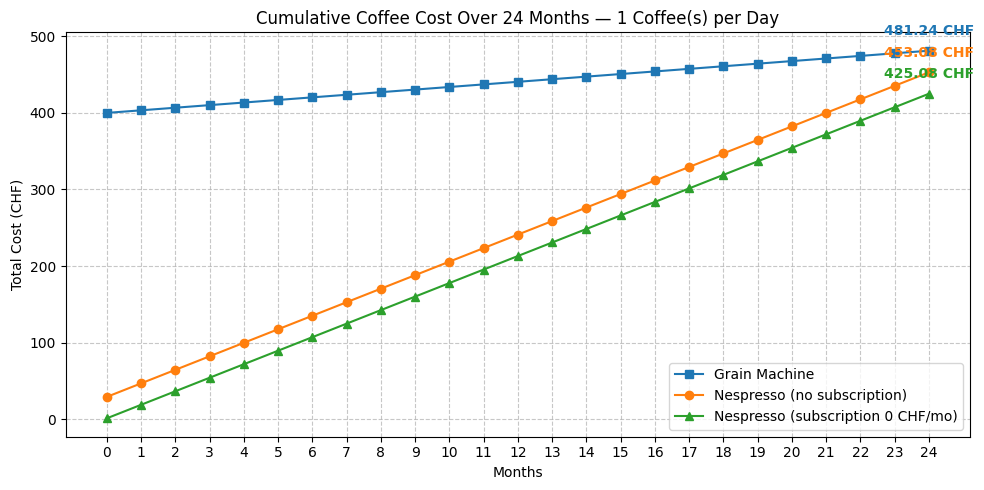

Saved: images/cost_comparison_2_per_day.png


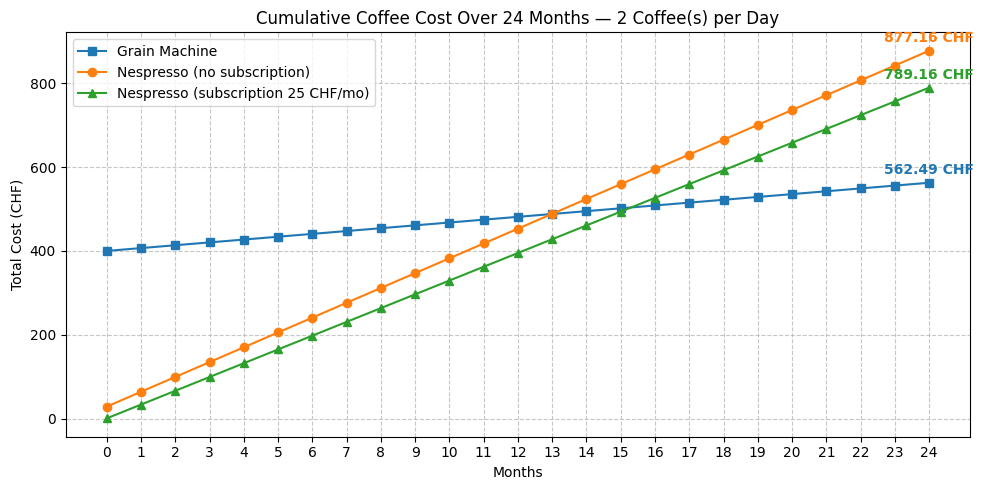

Saved: images/cost_comparison_3_per_day.png


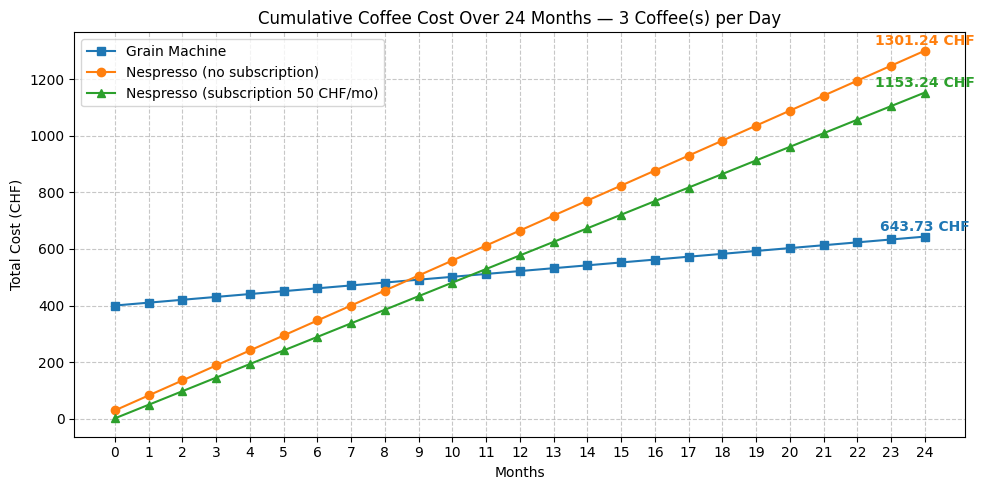

Saved: images/cost_comparison_10_per_day.png


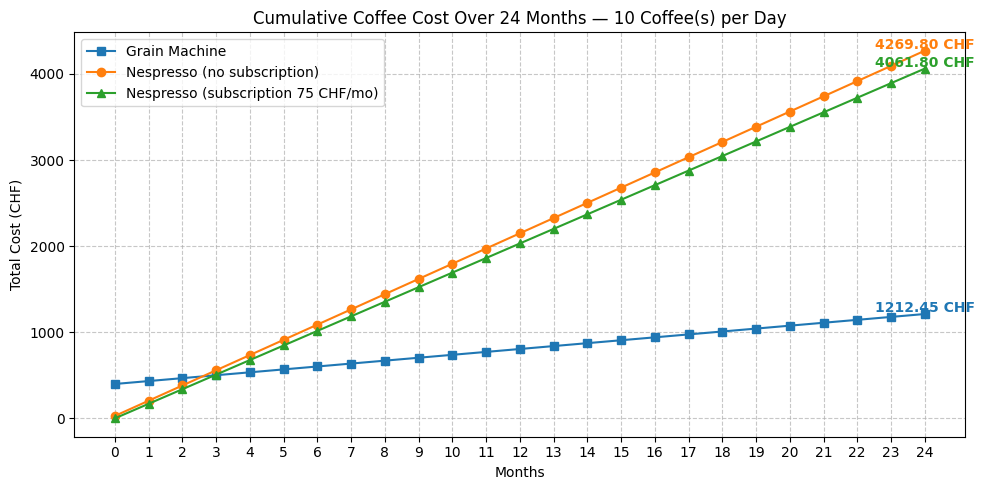

In [2]:
"""
Coffee Price Comparison Script
Author: David Lopes
Description:
    This script compares the cumulative coffee cost over 24 months
    between three systems:
        1. Traditional coffee machine (grains)
        2. Nespresso without subscription
        3. Nespresso with monthly subscription
"""

import matplotlib.pyplot as plt
import os

# Create an output folder for images if it doesn't exist
os.makedirs("images", exist_ok=True)

# === Base Parameters ===
DAYS_PER_MONTH = 31

# Coffee grain machine parameters
GRAIN_MACHINE_PRICE = 400          # CHF, initial cost
GRAIN_PRICE_100G = 1.56            # CHF per 100 g
COFFEE_WEIGHT_PER_CUP = 7          # g per coffee

# Nespresso parameters
NESPRESSO_MACHINE_PRICE = 29       # CHF, initial cost
NESPRESSO_10_CAPSULES = 5.70       # CHF per 10 capsules
NESPRESSO_MACHINE_PRICE_SUB = 1    # CHF (symbolic price with subscription)

# Subscription plans (CHF/month)
# Each plan includes a 10% bonus credit
subscription_plans = {
    1: {'monthly_fee': 25, 'credit': 27.5},
    2: {'monthly_fee': 50, 'credit': 55},
    3: {'monthly_fee': 75, 'credit': 82.5},
}

# === Simulation for 1, 2, and 3 coffees per day ===
for coffees_per_day in [1, 2, 3, 10]:

    # --- Monthly cost calculation ---
    capsule_price = NESPRESSO_10_CAPSULES / 10  # CHF per capsule
    monthly_capsule_cost = coffees_per_day * DAYS_PER_MONTH * capsule_price
    monthly_grain_cost = ((coffees_per_day * COFFEE_WEIGHT_PER_CUP * DAYS_PER_MONTH) / 100) * GRAIN_PRICE_100G

    monthly_capsule_cost_sub = monthly_capsule_cost
    monthly_fee = 0
    
    if(monthly_capsule_cost > 75):
        monthly_capsule_cost_sub = monthly_capsule_cost - 7.5
        monthly_fee = 75

    elif(monthly_capsule_cost > 50):
        monthly_capsule_cost_sub = monthly_capsule_cost - 5
        monthly_fee = 50

    elif(monthly_capsule_cost > 25):
        monthly_capsule_cost_sub = monthly_capsule_cost - 2.5
        monthly_fee = 25
    

    # --- Initial cumulative costs ---
    total_grain = GRAIN_MACHINE_PRICE
    total_nespresso = NESPRESSO_MACHINE_PRICE
    total_nespresso_sub = NESPRESSO_MACHINE_PRICE_SUB

    grain_costs, nespresso_costs, nespresso_sub_costs, months = [], [], [], []

    # --- 24-month simulation ---
    for month in range(25):  # 0–24 inclusive
        months.append(month)
        grain_costs.append(total_grain)
        nespresso_costs.append(total_nespresso)
        nespresso_sub_costs.append(total_nespresso_sub)

        # Grain machine cumulative cost
        total_grain += monthly_grain_cost

        # Nespresso without subscription
        total_nespresso += monthly_capsule_cost

        # Nespresso with subscription
        total_nespresso_sub += monthly_capsule_cost_sub

    # === Plot results ===
    plt.figure(figsize=(10, 5))
    plt.plot(months, grain_costs, label="Grain Machine", marker='s')
    plt.plot(months, nespresso_costs, label="Nespresso (no subscription)", marker='o')
    plt.plot(months, nespresso_sub_costs,
             label=f"Nespresso (subscription {monthly_fee} CHF/mo)", marker='^')

    # Final cost annotations
    plt.text(months[-1], grain_costs[-1] + 20, f"{grain_costs[-1]:.2f} CHF", color='C0', ha='center', fontweight='bold')
    plt.text(months[-1], nespresso_costs[-1] + 20, f"{nespresso_costs[-1]:.2f} CHF", color='C1', ha='center', fontweight='bold')
    plt.text(months[-1], nespresso_sub_costs[-1] + 20, f"{nespresso_sub_costs[-1]:.2f} CHF", color='C2', ha='center', fontweight='bold')

    # --- Graph styling ---
    plt.title(f"Cumulative Coffee Cost Over 24 Months — {coffees_per_day} Coffee(s) per Day")
    plt.xlabel("Months")
    plt.ylabel("Total Cost (CHF)")
    plt.xticks(range(0, 25))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # === Save the figure ===
    filename = f"images/cost_comparison_{coffees_per_day}_per_day.png"
    plt.savefig(filename, dpi=300)
    print(f"Saved: {filename}")
    plt.show()
    plt.close()  # close the figure to avoid overlap